# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("creditcard.csv")
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df["Class"] = df["Class"].astype("category")

In [10]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size = 0.5, random_state =10)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size = 0.6, random_state =10)

print("X_train: ",X_train.shape)
print("X_val: ",X_val.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_val: ",y_val.shape)
print("y_test: ",y_test.shape)

X_train:  (142403, 30)
X_val:  (56961, 30)
X_test:  (85443, 30)
y_train:  (142403,)
y_val:  (56961,)
y_test:  (85443,)


In [25]:
model = tf.keras.Sequential()
model.add(Input(X_train.shape[1]))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics ="accuracy")

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
4451/4451 [==============================] - 9s 2ms/step - loss: 28.3295 - accuracy: 0.9637 - val_loss: 0.1176 - val_accuracy: 0.9983
Epoch 2/10
4451/4451 [==============================] - 8s 2ms/step - loss: 0.5918 - accuracy: 0.9967 - val_loss: 0.0164 - val_accuracy: 0.9986
Epoch 3/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0226 - accuracy: 0.9984 - val_loss: 0.0156 - val_accuracy: 0.9982
Epoch 4/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0212 - accuracy: 0.9984 - val_loss: 0.0131 - val_accuracy: 0.9982
Epoch 5/10
4451/4451 [==============================] - 8s 2ms/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.0129 - val_accuracy: 0.9982
Epoch 6/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0159 - accuracy: 0.9982 - val_loss: 0.0129 - val_accuracy: 0.9982
Epoch 7/10
4451/4451 [==============================] - 8s 2ms/step - loss: 0.0129 - accuracy: 0.9983 - val_loss: 0.0129 - val_accuracy

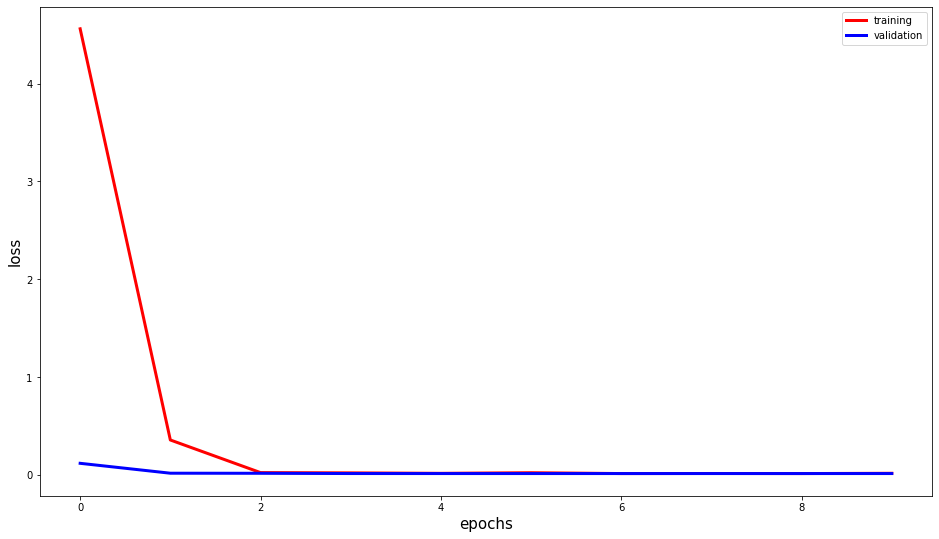

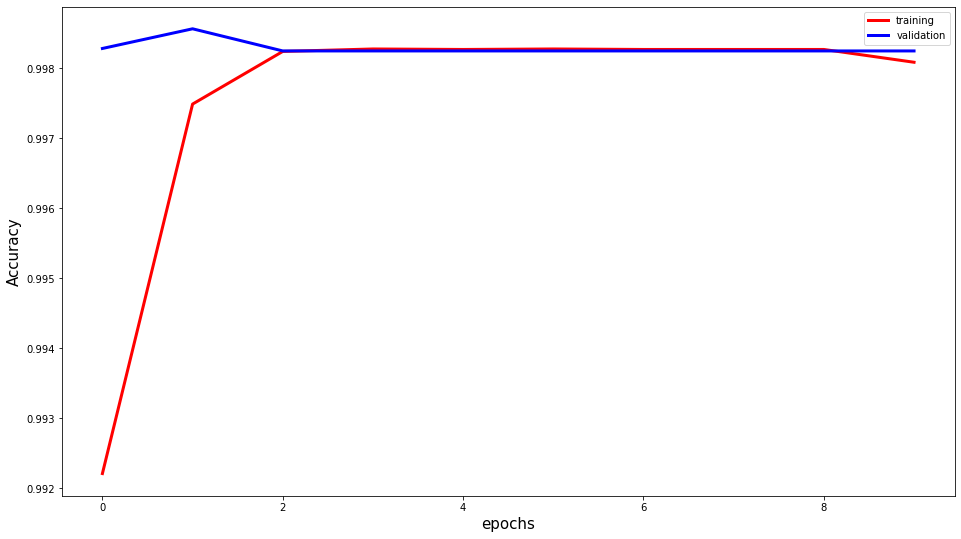

In [27]:
# Plot history

fig = plt.figure(figsize=(16,9))
plt.rcParams['axes.labelsize'] = 15
plt.plot(history.history['loss'],'red',linewidth=3.0, label ="training")
plt.plot(history.history['val_loss'],'blue',linewidth=3.0, label = "validation")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure(figsize=(16,9))
plt.rcParams['axes.labelsize'] = 15
plt.plot(history.history['accuracy'],'red',linewidth=3.0, label ="training")
plt.plot(history.history['val_accuracy'],'blue',linewidth=3.0, label = "validation")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
668/668 [==============================] - 1s 1ms/step - loss: 0.0127 - accuracy: 0.9983
test loss, test acc: [0.012672155164182186, 0.9982795715332031]
Generate predictions for 3 samples
predictions shape: (3, 1)


In [29]:
predictions

array([[0.0013032],
       [0.0013032],
       [0.0013032]], dtype=float32)